<a href="https://colab.research.google.com/github/ZackAkil/optimising-basketball/blob/master/Frame_trails.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-video --quiet

    100% |████████████████████████████████| 2.3MB 1.4MB/s 


In [0]:
!apt-get -qq install -qq ffmpeg -qq

In [3]:
!wget https://github.com/ZackAkil/optimising-basketball/raw/master/VID_20180930_193148_2.mp4

--2019-03-08 12:58:57--  https://github.com/ZackAkil/optimising-basketball/raw/master/VID_20180930_193148_2.mp4
Resolving github.com (github.com)... 192.30.253.112, 192.30.253.113
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ZackAkil/optimising-basketball/master/VID_20180930_193148_2.mp4 [following]
--2019-03-08 12:58:57--  https://raw.githubusercontent.com/ZackAkil/optimising-basketball/master/VID_20180930_193148_2.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17146524 (16M) [application/octet-stream]
Saving to: ‘VID_20180930_193148_2.mp4’

VID_20180930_193148 100%[===================>]  16.35M  97.8MB/s    in 0.2s    

2019-03-08 12:58:

In [0]:
from skvideo.io import vread

In [0]:
import matplotlib.pyplot as plt

In [0]:
import numpy as np
import skvideo

filename = 'VID_20180930_193148_2.mp4'

In [0]:
video_data = vread(filename)[90:150]

In [8]:
video_data.shape

(60, 1080, 1920, 3)

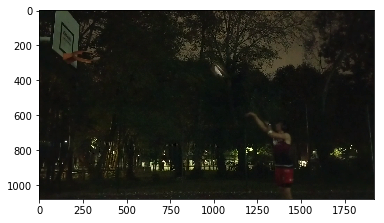

In [12]:
# test view image
plt.imshow(video_data[15])

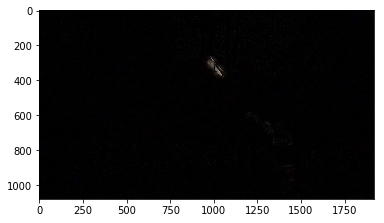

In [16]:
# test view delta image
plt.imshow(abs(video_data[15].astype(np.int32) - video_data[15+1].astype(np.int32)))

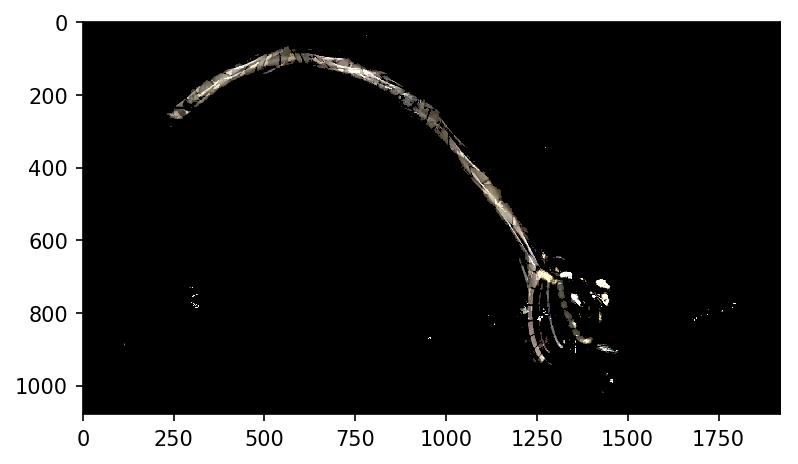

In [13]:
# join together all delta frames within a video clip

trail_frame = np.zeros([1080, 1920, 3])

for i , frame in enumerate(video_data[20:-20][:-1]):
  
  delta = abs(frame.astype(np.int32) - video_data[i+1].astype(np.int32))
  change_mask = delta.sum(axis=2)>160
  trail_frame[change_mask] += delta[change_mask]
  
trail_frame = np.clip(trail_frame, 0, 255).astype(np.uint8)
plt.figure(dpi=150)
plt.grid(False)
plt.imshow(trail_frame)

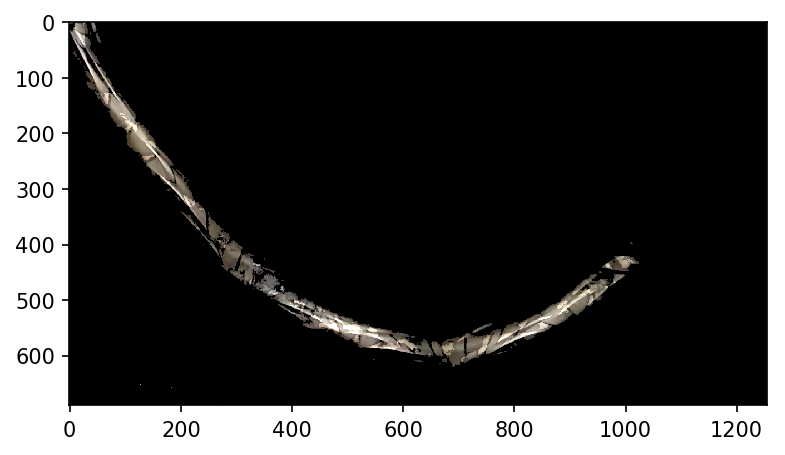

In [14]:
#@title Crop ball trail { run: "auto" }
x_lim = 690 #@param {type:"slider", min:0, max:1500, step:1}
y_lim = 1255 #@param {type:"slider", min:1000, max:1500, step:1}

cropped_trail = trail_frame[:x_lim, :y_lim][::-1,::-1]
plt.figure(dpi=150)
plt.grid(False)

plt.imshow(cropped_trail)

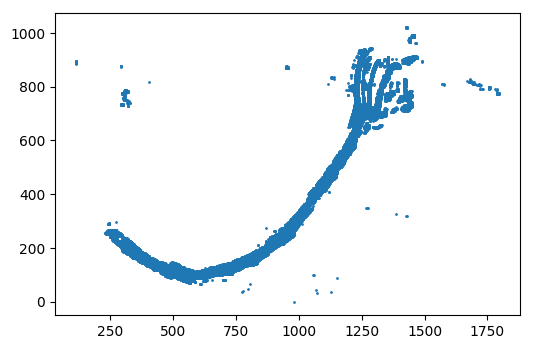

In [15]:
y, x = np.where(trail_frame.sum(axis=2))
plt.figure(dpi=100)
plt.scatter(x, y, s=1)